In [17]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

# Basic Pytorch functions

In [2]:
x = torch.Tensor([5, 3])
y = torch.Tensor([2, 1])

In [3]:
print(x*y)

tensor([10.,  3.])


In [4]:
x = torch.zeros([2, 10])
x

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
x.shape

torch.Size([2, 10])

In [9]:
## Its basically like Numpy, Only it runs on GPU

In [7]:
x = torch.rand([2, 5])
x

tensor([[0.5870, 0.2593, 0.3363, 0.4679, 0.5092],
        [0.3371, 0.6053, 0.8626, 0.6786, 0.6590]])

In [12]:
flatten_x = x.view([1, 10])
flatten_x

tensor([[0.5870, 0.2593, 0.3363, 0.4679, 0.5092, 0.3371, 0.6053, 0.8626, 0.6786,
         0.6590]])

# Data

## We will work on MNIST dataset

In [15]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


## Need to convert the dataset into a dataset object with batch

In [16]:
train_set = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
test_set = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [18]:
for data in train_set:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [19]:
x, y = data[0][0], data[1][0]

In [20]:
x.shape

torch.Size([1, 28, 28])

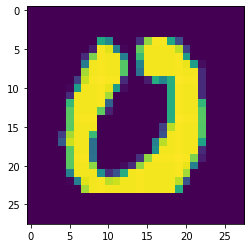

In [21]:
plt.imshow(x.view([28, 28]))
plt.show()

## Class balance needs to be checked to see if the model is getting the same amount of data for both classes

In [23]:
total = 0
class_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in train_set:
    X, Y = data
    for y in Y:
        class_dict[int(y)] += 1
        total += 1
print(class_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for i in class_dict:
    print(f"{i}: {class_dict[i]/total*100}")